In [1]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import scipy.signal as ss
MIDIFROM = 24
MIDITO = 108
SKIP_SEC = 0.25
HOWMUCH_SEC = 0.5
WHOLETONE_SEC = 2
tones = np.arange(MIDIFROM, MIDITO+1)
basicFreq1 = np.zeros(109)

# Nahrání 0.5 sekund z každého tónu

In [123]:
orig, Fs = sf.read("../audio/klavir.wav")
N = int(Fs*HOWMUCH_SEC)
N_wholetone = int(Fs*WHOLETONE_SEC)
xall = np.zeros((MIDITO+1, N))

samplefrom = int(SKIP_SEC*Fs)
sampleto = samplefrom + N

for tone in tones:
    x = orig[samplefrom:sampleto]
    x = x - np.mean(x)
    xall[tone] = x
    samplefrom += N_wholetone
    sampleto += N_wholetone

# Uložení originálních tónů

In [124]:
sf.write("../audio/a_orig.wav", xall[27], Fs)
sf.write("../audio/b_orig.wav", xall[60], Fs)
sf.write("../audio/c_orig.wav", xall[83], Fs)

# Vykreslení tónu MIDI 27 a jeho spektrum

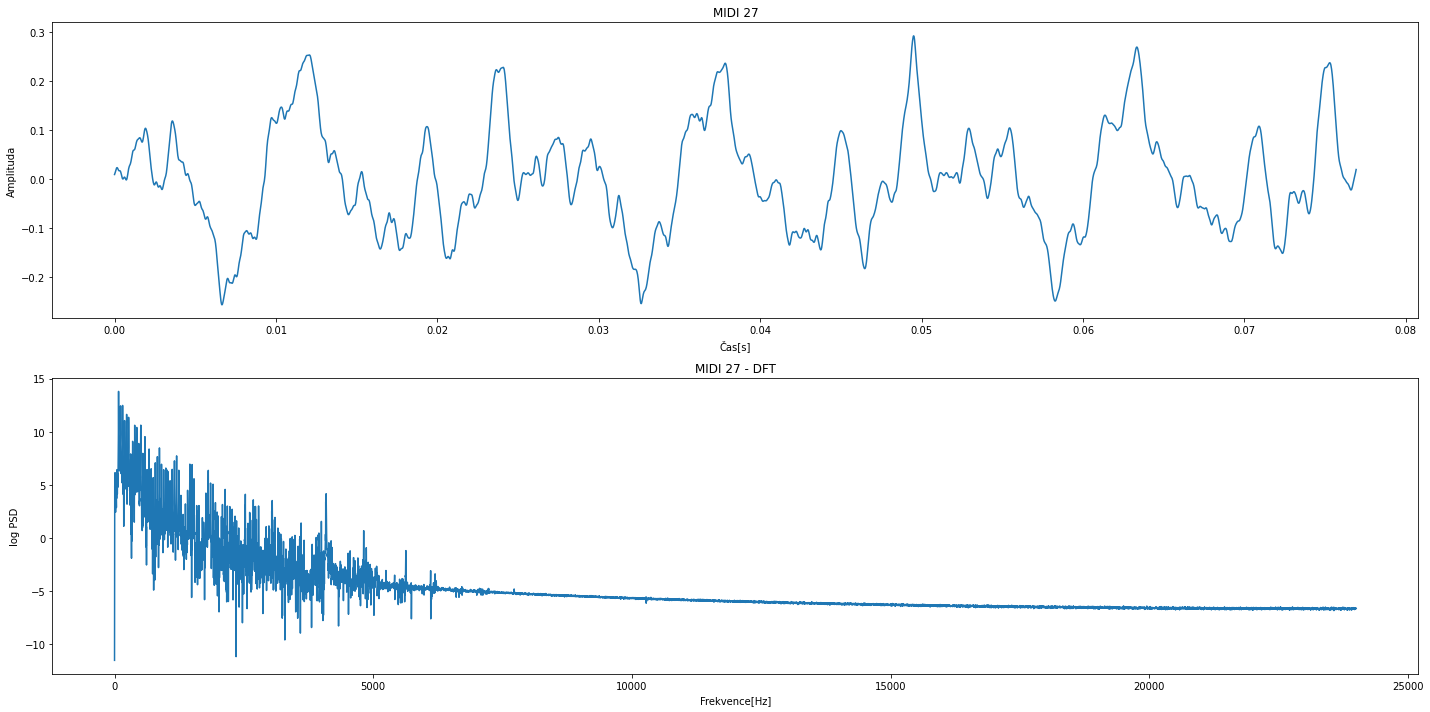

In [108]:
midi_period = 1/39
midi_samples = int(midi_period * Fs)*3
time_steps = np.linspace(0, midi_period*3, midi_samples)

_, ax = plt.subplots(2,1,figsize=(20,10))

ax[0].set_title("MIDI 27")
ax[0].set_xlabel("Čas[s]")
ax[0].set_ylabel("Amplituda")
ax[0].plot(time_steps, xall[27][:midi_samples])

ax[1].set_title("MIDI 27 - DFT")
ax[1].set_xlabel("Frekvence[Hz]")
ax[1].set_ylabel("log PSD")
midi27_dft = np.fft.fft(xall[27])
midi27_module = np.abs(midi27_dft)
midi27_module_half = midi27_module[:midi27_module.size//2]
midi27_freq = np.arange(midi27_module_half.size)*(Fs / midi27_module.size)
ax[1].plot(midi27_freq, np.log(midi27_module_half**2+1e-5))

plt.tight_layout()
plt.show()

# Vykreslení tónu MIDI 60 a jeho spektrum

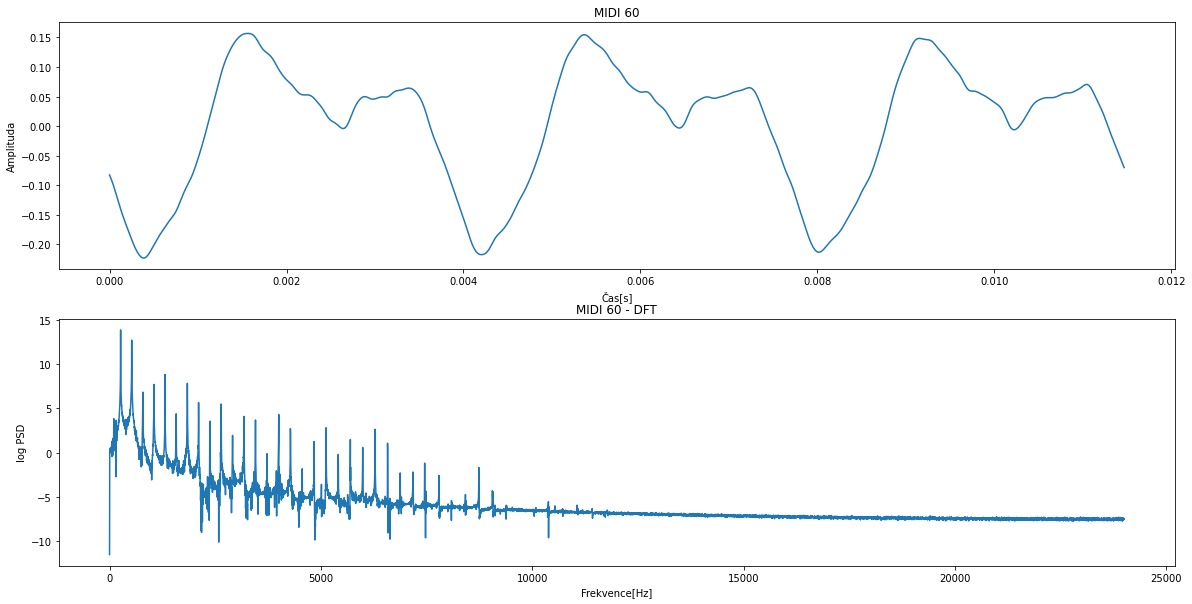

In [109]:
midi_period = 1/261.63
midi_samples = int(midi_period * Fs)*3
time_steps = np.linspace(0, midi_period*3, midi_samples)

_, ax = plt.subplots(2,1,figsize=(20,10))

ax[0].set_title("MIDI 60")
ax[0].set_xlabel("Čas[s]")
ax[0].set_ylabel("Amplituda")
ax[0].plot(time_steps, xall[60][:midi_samples])

ax[1].set_title("MIDI 60 - DFT")
ax[1].set_xlabel("Frekvence[Hz]")
ax[1].set_ylabel("log PSD")
midi60_dft = np.fft.fft(xall[60])
midi60_module = np.abs(midi60_dft)
midi60_module_half = midi60_module[:midi60_module.size//2]
midi60_freq = np.arange(midi60_module_half.size)*(Fs / midi60_module.size)
ax[1].plot(midi60_freq, np.log(midi60_module_half**2 + 1e-5))

plt.show()

# Vykreslení tónu MIDI 83 a jeho spektrum

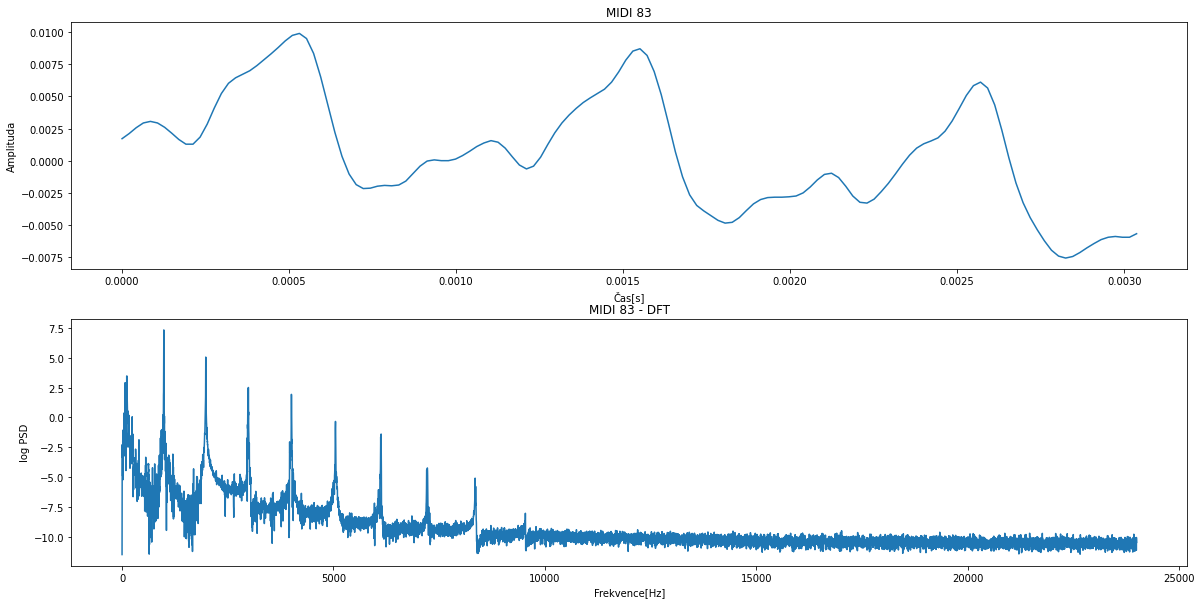

In [110]:

midi_period = 1/987.77
midi_samples = int(midi_period * Fs)*3
time_steps = np.linspace(0, midi_period*3, midi_samples)

_, ax = plt.subplots(2,1,figsize=(20,10))

ax[0].set_title("MIDI 83")
ax[0].set_xlabel("Čas[s]")
ax[0].set_ylabel("Amplituda")
ax[0].plot(time_steps, xall[83][:midi_samples])

ax[1].set_title("MIDI 83 - DFT")
ax[1].set_xlabel("Frekvence[Hz]")
ax[1].set_ylabel("log PSD")
midi83_dft = np.fft.fft(xall[83])
midi83_module = np.abs(midi83_dft)
midi83_module_half = midi83_module[:midi83_module.size//2]
midi83_freq = np.arange(midi83_module_half.size)*(Fs / midi83_module.size)
ax[1].plot(midi83_freq, np.log(midi83_module_half**2 + 1e-5))


plt.show()

# Spocitani DFT pro všechny tóny
Můžeme vidět že, DFT nefunguje správně na tóny o nižších frekvencích. Pro tóny MIDI 24-42 výchází odhad základní frekvence dvojnásobný. U nižších tónu je lepší použít autokorelaci

In [7]:
for tone in range(MIDIFROM, MIDITO+1):
    tone_dft = np.fft.fft(xall[tone])
    tone_module = np.abs(tone_dft)
    tone_modulehalf = tone_module[:tone_module.size//2]
    peaks, _ = ss.find_peaks(tone_modulehalf)
    max_freq = peaks[np.argmax(tone_modulehalf[peaks])]*(Fs/tone_module.size)
    print("tone: ", tone, " basic freq: ", max_freq)


tone:  24  basic freq:  66.0
tone:  25  basic freq:  70.0
tone:  26  basic freq:  74.0
tone:  27  basic freq:  78.0
tone:  28  basic freq:  82.0
tone:  29  basic freq:  88.0
tone:  30  basic freq:  92.0
tone:  31  basic freq:  98.0
tone:  32  basic freq:  104.0
tone:  33  basic freq:  110.0
tone:  34  basic freq:  116.0
tone:  35  basic freq:  124.0
tone:  36  basic freq:  130.0
tone:  37  basic freq:  138.0
tone:  38  basic freq:  220.0
tone:  39  basic freq:  234.0
tone:  40  basic freq:  248.0
tone:  41  basic freq:  88.0
tone:  42  basic freq:  92.0
tone:  43  basic freq:  98.0
tone:  44  basic freq:  104.0
tone:  45  basic freq:  110.0
tone:  46  basic freq:  118.0
tone:  47  basic freq:  124.0
tone:  48  basic freq:  130.0
tone:  49  basic freq:  138.0
tone:  50  basic freq:  146.0
tone:  51  basic freq:  156.0
tone:  52  basic freq:  164.0
tone:  53  basic freq:  350.0
tone:  54  basic freq:  370.0
tone:  55  basic freq:  392.0
tone:  56  basic freq:  208.0
tone:  57  basic freq

# Spocitani autokorelace pro vsechny tony
U autokorelace naopak odhad frekvence vychází velmi dobře u nižších frekvencí ale u vyšších nám autokorelace nefunguje.

In [8]:
for tone in range(MIDIFROM, MIDITO+1):
    tone_correlation = np.correlate(xall[tone], xall[tone], 'full')

    peaks, _ = ss.find_peaks(tone_correlation[:(tone_correlation.size // 2)+1])
    max_freq = peaks[np.argmax(tone_correlation[peaks])]
    second_max_freq = peaks[np.argpartition(tone_correlation[peaks], -2)[-2]]
    samples = max_freq - second_max_freq
    basic_freq = (1/samples)*Fs
    print("tone: ", tone, " basic freq: ", basic_freq)


tone:  24  basic freq:  32.76450511945392
tone:  25  basic freq:  34.73227206946454
tone:  26  basic freq:  36.7816091954023
tone:  27  basic freq:  38.961038961038966
tone:  28  basic freq:  41.2725709372313
tone:  29  basic freq:  43.71584699453552
tone:  30  basic freq:  46.33204633204633
tone:  31  basic freq:  49.079754601227
tone:  32  basic freq:  51.94805194805195
tone:  33  basic freq:  55.10907003444317
tone:  34  basic freq:  58.3232077764277
tone:  35  basic freq:  61.855670103092784
tone:  36  basic freq:  65.57377049180327
tone:  37  basic freq:  69.46454413892909
tone:  38  basic freq:  73.50689127105666
tone:  39  basic freq:  77.92207792207793
tone:  40  basic freq:  82.47422680412372
tone:  41  basic freq:  87.5912408759124
tone:  42  basic freq:  93.02325581395348
tone:  43  basic freq:  98.56262833675565
tone:  44  basic freq:  104.12147505422993
tone:  45  basic freq:  110.34482758620689
tone:  46  basic freq:  117.07317073170732
tone:  47  basic freq:  123.3933161

In [8]:
for tone in range(24, 42):
    tone_correlation = np.correlate(xall[tone], xall[tone], 'full')

    peaks, _ = ss.find_peaks(tone_correlation[:(tone_correlation.size // 2)+1])
    max_freq = peaks[np.argmax(tone_correlation[peaks])]
    second_max_freq = peaks[np.argpartition(tone_correlation[peaks], -2)[-2]]
    samples = max_freq - second_max_freq
    basic_freq = (1/samples)*Fs
    basicFreq1[tone] = basic_freq

for tone in range(42, MIDITO+1):
    tone_dft = np.fft.fft(xall[tone])
    tone_module = np.abs(tone_dft)
    tone_modulehalf = tone_module[:tone_module.size//2]
    peaks, _ = ss.find_peaks(tone_modulehalf)
    max_freq = peaks[np.argmax(tone_modulehalf[peaks])]*(Fs/tone_module.size)
    basicFreq1[tone] = max_freq

# Autokorelace pro ton MIDI 27
Pro můj tón 27 jsem použil autokorelaci abych měl odhad základní frekvence co nejpřesnější. Základní frekvenci jsem spočítal tak, že jsem vzal největší koeficient a druhý největší koeficient a rozdíl frkevence mezi nimi označil za základní frekvenci.

Tón: 27, Odhadnutá frekvence:  39.02439024390244 , Skutečná frekvence: 38.89


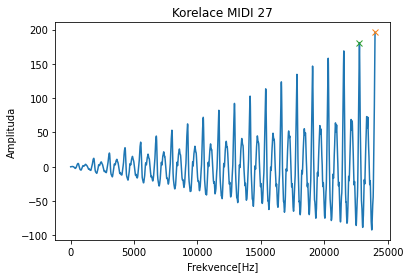

In [95]:
midi27_correlation = np.correlate(xall[27], xall[27], 'full')
midi27_correlationhalf = midi27_correlation[:midi27_correlation.size // 2 + 2]
peaks, _ = ss.find_peaks(midi27_correlationhalf)
max_freq = peaks[np.argmax(midi27_correlationhalf[peaks])]
second_max_freq = peaks[np.argpartition(midi27_correlationhalf[peaks], -2)[-2]]
samples = max_freq - second_max_freq
midi27_basicfreq = (1/samples)*Fs
print("Tón: 27, Odhadnutá frekvence: ", midi27_basicfreq,", Skutečná frekvence: 38.89")
plt.title("Korelace MIDI 27")
plt.xlabel("Frekvence[Hz]")
plt.ylabel("Amplituda")
plt.plot(midi27_correlation[:(midi27_correlation.size // 2)+1])
plt.plot(max_freq,midi27_correlation[:(midi27_correlation.size // 2)+1][int(max_freq)], 'x')
plt.plot(second_max_freq, midi27_correlation[:(midi27_correlation.size // 2)+1][int(second_max_freq)], 'x')
plt.show()


# DFT pro ton MIDI 60
Odhad základní frekvence jsem určil pomocí největšího koeficientu DFT.

Tón: 60, Odhadnutá frekvence:  262.0 , Skutečná frekvence: 261.63


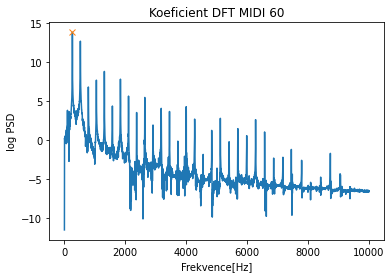

In [96]:
midi60_dft = np.fft.fft(xall[60])
tone_module = np.abs(midi60_dft)
tone_modulehalf = tone_module[:tone_module.size//2]
peaks, _ = ss.find_peaks(tone_modulehalf)
midi60_basicfreq = peaks[np.argmax(tone_modulehalf[peaks])]*(Fs/tone_module.size)
print("Tón: 60, Odhadnutá frekvence: ", midi60_basicfreq,", Skutečná frekvence: 261.63")
tone_freq = np.arange(tone_modulehalf.size)*(Fs / tone_module.size)
plt.title("Koeficient DFT MIDI 60")
plt.xlabel("Frekvence[Hz]")
plt.ylabel("log PSD")
plt.plot(tone_freq[:5000], np.log(tone_modulehalf**2 + 1e-5)[:5000])
plt.plot(midi60_basicfreq, np.log(tone_modulehalf**2 + 1e-5)[int(midi60_basicfreq/2)], 'x')
plt.show()

# DFT pro MIDI 83
Odhad jsem určil stejně jako u MIDI 60

Tón: 83, Odhadnutá frekvence:  988.0 , Skutečná frekvence: 987.77


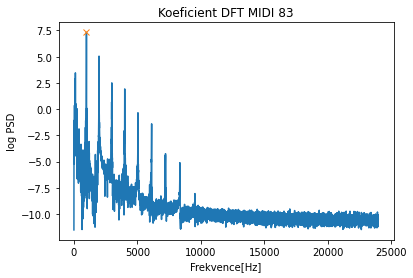

In [119]:
midi83_dft = np.fft.fft(xall[83])
tone_module = np.abs(midi83_dft)
tone_modulehalf = tone_module[:tone_module.size//2]
peaks, _ = ss.find_peaks(tone_modulehalf)
midi83_basicfreq = peaks[np.argmax(tone_modulehalf[peaks])]*(Fs/tone_module.size)
print("Tón: 83, Odhadnutá frekvence: ", midi83_basicfreq,", Skutečná frekvence: 987.77")
plt.title("Koeficient DFT MIDI 83")
plt.xlabel("Frekvence[Hz]")
plt.ylabel("log PSD")
tone_freq = np.arange(tone_modulehalf.size)*(Fs / tone_module.size)
plt.plot(tone_freq[:5000], np.log(tone_modulehalf**2 + 1e-5)[:5000])
plt.plot(midi83_basicfreq, np.log(tone_modulehalf**2 + 1e-5)[int(midi83_basicfreq/2)], 'x')
plt.show()

# Zpresnění odhadu tónů MIDI 42-108
Pro MIDI nižší než 42 se nevyplatí zpřesňovat pomocí DTFT, odhad pomocí autokorelace je u nížších tónů přesnější. Naopak u tónů 42-108 provedeme DTFT v okolí 100 centů původního odhadu základní frekvence. Cent je jednotka, která určuje poměr mezi frekvenci. Nejdříve si zjistíme spodní a horní hranici intervalu. Zjistil jsem že počet vzorků intervalu hraje velkou roli ve výsledku základní frekvence, proto je potřeba určit nejlepší konstantu.

In [9]:
for tone in range(42, MIDITO+1):
    max_freq = basicFreq1[tone]
    if tone in range (53,56):
        max_freq = max_freq//2

    ffrom = max_freq/1.029302
    fto = max_freq*1.029302
    n = np.arange(0,N)
    fsweep = np.linspace(ffrom, fto, 1000)
    A = np.zeros([1000, N],dtype=complex) 
    for k in np.arange(0,1000):
        A[k,:] = np.exp(-1j * 2 * np.pi * fsweep[k] / Fs * n)     # norm. omega = 2 * pi * f / Fs ... 
    Xdtft = np.matmul(A,xall[tone].T)
    precisefmax = fsweep[np.argmax(np.abs(Xdtft))]
    basicFreq1[tone]=precisefmax

    print("basic_freq: ",max_freq," precise: ", precisefmax)


basic_freq:  92.0  precise:  92.9241757118047
basic_freq:  98.0  precise:  98.4574067189066
basic_freq:  104.0  precise:  104.30498890287981
basic_freq:  110.0  precise:  110.5070546619489
basic_freq:  118.0  precise:  117.07001988632557
basic_freq:  124.0  precise:  123.1876572571989
basic_freq:  130.0  precise:  130.50903526415635
basic_freq:  138.0  precise:  138.269033115692
basic_freq:  146.0  precise:  146.68144266286083
basic_freq:  156.0  precise:  155.3839706156444
basic_freq:  164.0  precise:  164.6137163537439
basic_freq:  175.0  precise:  174.51133821677215
basic_freq:  185.0  precise:  184.88994315823084
basic_freq:  196.0  precise:  195.88339923790946
basic_freq:  208.0  precise:  207.8040914921322
basic_freq:  220.0  precise:  220.14900748320707
basic_freq:  234.0  precise:  233.23833600158554
basic_freq:  248.0  precise:  247.07803627696956
basic_freq:  262.0  precise:  261.7683814772574
basic_freq:  278.0  precise:  277.336258485415
basic_freq:  294.0  precise:  293.62

# Zpřesnění mých tří tónů

In [101]:
print("Tón: 27, Odhadnutá frekvence: ", basicFreq1[27],", Skutečná frekvence: 38.89")
print("Tón: 60, Odhadnutá frekvence: ", basicFreq1[60],", Skutečná frekvence: 261.63")
print("Tón: 83, Odhadnutá frekvence: ", basicFreq1[83],", Skutečná frekvence: 987.77")

Tón: 27, Odhadnutá frekvence:  38.961038961038966 , Skutečná frekvence: 38.89
Tón: 60, Odhadnutá frekvence:  261.7683814772574 , Skutečná frekvence: 261.63
Tón: 83, Odhadnutá frekvence:  987.526504437148 , Skutečná frekvence: 987.77


# Reprezentace všech tónů pomocí 10 floating point čísel
Ná 5-ti násobních původních odhadnutých základních frekvencích, provedeme DTFT opět na 100 centech. Určíme nějvětší koeficient z daného okolí násobku a uložíme si jeho modul a fázi.

In [10]:
fp_tones = np.zeros((85,10))
for tone in range(24, MIDITO+1):
    precisefmax = basicFreq1[tone]
    print(tone)
    for i in range(1, 6):
        ffrom = precisefmax*i/1.029302
        fto = precisefmax*i*1.029302
        fsweep = np.linspace(ffrom, fto, 1000)
        A = np.zeros([1000, N],dtype=complex) 
        for k in np.arange(0,1000):
            A[k,:] = np.exp(-1j * 2 * np.pi * fsweep[k] / Fs * n)
        Xdtft = np.matmul(A,xall[tone].T)
        dtft_max = np.argmax(np.abs(Xdtft))
        fp_tones[tone-24][i-1] = np.abs(Xdtft[dtft_max])
        fp_tones[tone-24][i+4] = np.angle(Xdtft[dtft_max])

    print(fp_tones[tone-24])
        


24
[ 3.30791807e+01  1.05969202e+03  6.45782543e+02  5.49118928e+02
  3.08728468e+02  1.41435222e+00 -2.46459689e-01  2.38113752e-02
  3.73902695e-01 -2.64241009e+00]
25
[ 1.31934137e+01  1.04250686e+03  6.38170011e+02  5.40867902e+02
  3.09308107e+02  1.05813462e+00 -4.60421683e-01  2.95896523e+00
  1.46613150e-01 -2.41637878e-01]
26
[ 2.24706083e+01  1.02934679e+03  6.19072173e+02  5.17805882e+02
  3.04003897e+02  1.22121186e+00 -2.49771025e-01  3.77542493e-02
  4.48159158e-01 -2.65856066e+00]
27
[ 1.89193624e+01  1.01619045e+03  6.30213751e+02  5.17551725e+02
  2.88476501e+02 -2.96713954e+00  2.72500994e-01 -2.19002779e+00
  1.73558921e+00  1.72236539e+00]
28
[ 16.45330317 986.16533219 578.81933472 478.57331699 307.34845299
   2.04943975   1.28902287   2.41139281  -2.61287519   1.03530339]
29
[ 1.97722061e+01  1.01872448e+03  6.06758981e+02  5.06089627e+02
  2.95579005e+02 -2.56520569e+00  2.58591843e+00  1.32822641e+00
  1.55406772e-01  1.24209024e+00]
30
[ 1.32667520e+01  9.970862

# Koeficienty násobků MIDI 27


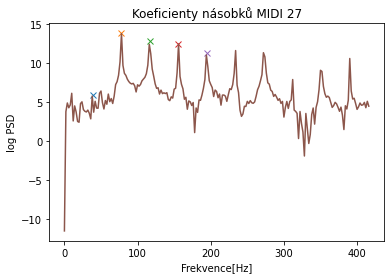

In [111]:
tone_dft = np.fft.fft(xall[27])
tone_module = np.abs(tone_dft)
tone_modulehalf = tone_module[:tone_module.size//2]

precisefmax = basicFreq1[27]
for i in range(1, 6):
    ffrom = precisefmax*i/1.029302
    fto = precisefmax*i*1.029302
    fsweep = np.linspace(ffrom, fto, 1000*i)
    
    A = np.zeros([1000*i, N],dtype=complex) 
    for k in np.arange(0,1000*i):
        A[k,:] = np.exp(-1j * 2 * np.pi * fsweep[k] / Fs * n)
    Xdtft = np.matmul(A,xall[27].T)
    dtft_max = np.argmax(np.abs(Xdtft))
    plt.plot(precisefmax*i, np.log(np.abs(Xdtft[dtft_max])**2 + 1e-5), 'x')

tone_freq = np.arange(tone_modulehalf.size)*(Fs / tone_module.size)
plt.plot(tone_freq[:int(precisefmax)*11//2], np.log(np.abs(tone_modulehalf)**2 +1e-5)[:int(precisefmax)*11//2])
plt.title("Koeficienty násobků MIDI 27")
plt.xlabel("Frekvence[Hz]")
plt.ylabel("log PSD")

plt.show()

# Koeficienty násobků MIDI 60

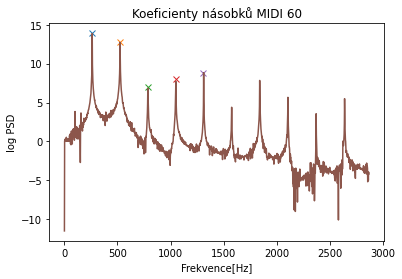

In [112]:

tone_dft = np.fft.fft(xall[60])
tone_module = np.abs(tone_dft)
tone_modulehalf = tone_module[:tone_module.size//2]

precisefmax = basicFreq1[60]

for i in range(1, 6):
    ffrom = precisefmax*i/1.029302
    fto = precisefmax*i*1.029302
    fsweep = np.linspace(ffrom, fto, 1000*i)
    A = np.zeros([1000*i, N],dtype=complex) 
    for k in np.arange(0,1000*i):
        A[k,:] = np.exp(-1j * 2 * np.pi * fsweep[k] / Fs * n)     # norm. omega = 2 * pi * f / Fs ... 
    Xdtft = np.matmul(A,xall[60].T)
    dtft_max = np.argmax(np.abs(Xdtft))
    plt.plot(precisefmax*i, np.log(np.abs(Xdtft[dtft_max])**2 + 1e-5), 'x')

tone_freq = np.arange(tone_modulehalf.size)*(Fs / tone_module.size)
plt.plot(tone_freq[:int(precisefmax)*11//2], np.log(np.abs(tone_modulehalf)**2 + 1e-5)[:int(precisefmax)*11//2])
plt.title("Koeficienty násobků MIDI 60")
plt.xlabel("Frekvence[Hz]")
plt.ylabel("log PSD")

plt.show()
    

# Koeficienty nasobků MIDI 83

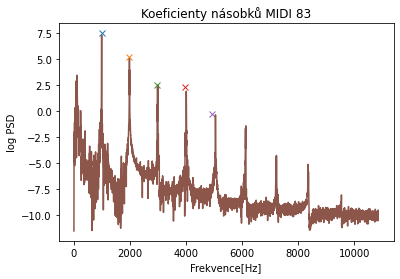

In [113]:
tone_dft = np.fft.fft(xall[83])
tone_module = np.abs(tone_dft)
tone_modulehalf = tone_module[:tone_module.size//2]

precisefmax = basicFreq1[83]

for i in range(1, 6):
    ffrom = precisefmax*i/1.029302
    fto = precisefmax*i*1.029302
    fsweep = np.linspace(ffrom, fto, 1000)
    A = np.zeros([1000, N],dtype=complex) 
    for k in np.arange(0,1000):
        A[k,:] = np.exp(-1j * 2 * np.pi * fsweep[k] / Fs * n)     # norm. omega = 2 * pi * f / Fs ... 
    Xdtft = np.matmul(A,xall[83].T)
    dtft_max = np.argmax(np.abs(Xdtft))
    plt.plot(precisefmax*i, np.log(np.abs(Xdtft)[dtft_max]**2 + 1e-5), 'x')

tone_freq = np.arange(tone_modulehalf.size)*(Fs / tone_module.size)
plt.plot(tone_freq[:int(precisefmax)*11//2], np.log(tone_modulehalf**2 + 1e-5)[:int(precisefmax)*11//2])
plt.title("Koeficienty násobků MIDI 83")
plt.xlabel("Frekvence[Hz]")
plt.ylabel("log PSD")

plt.show()

# Syntéza původního signálu
Syntézu provádím pomocí sčítání cosinusovek, které násobím modulem koeficientu, a u cosinusovky používám fázi koeficientu. Je potřeba kontrolovat jestli se neporuší vzorkovací toerém. Výsledný signál můžeme synchronizovat tak že provedeme korelaci s originálním tónem a zjistíme o kolik je tón posunutý. V mém případě jsem korelaci využít nemusel protože mi tóny vycházeli dobře zarovnané a snížila se tím i rychlost výpočtu. Syntetizovaný signál je potřeba normalizovat, a vynásobit ho amplitudou originálního tónu.

In [62]:
def get_synthesized_tone(tone, sec, samplerate):
    freq = basicFreq1[tone]
    n = np.arange(0,int(sec*samplerate))
    final_signal = np.zeros(int(sec*samplerate))
    for i in range(1, 6):
        if freq*i < samplerate/2:
            signal = fp_tones[tone-24][i-1]*np.cos(2*np.pi*(freq*i/samplerate)*n + fp_tones[tone-24][i+4])
            final_signal += signal

    # synchronized the phase
    # final_corr = np.correlate(xall[tone], final_signal, 'full')
    # phase_offset = np.argmax(final_corr[:(final_corr.size//2)])
    # final_signal = np.roll(final_signal, phase_offset)

    return final_signal

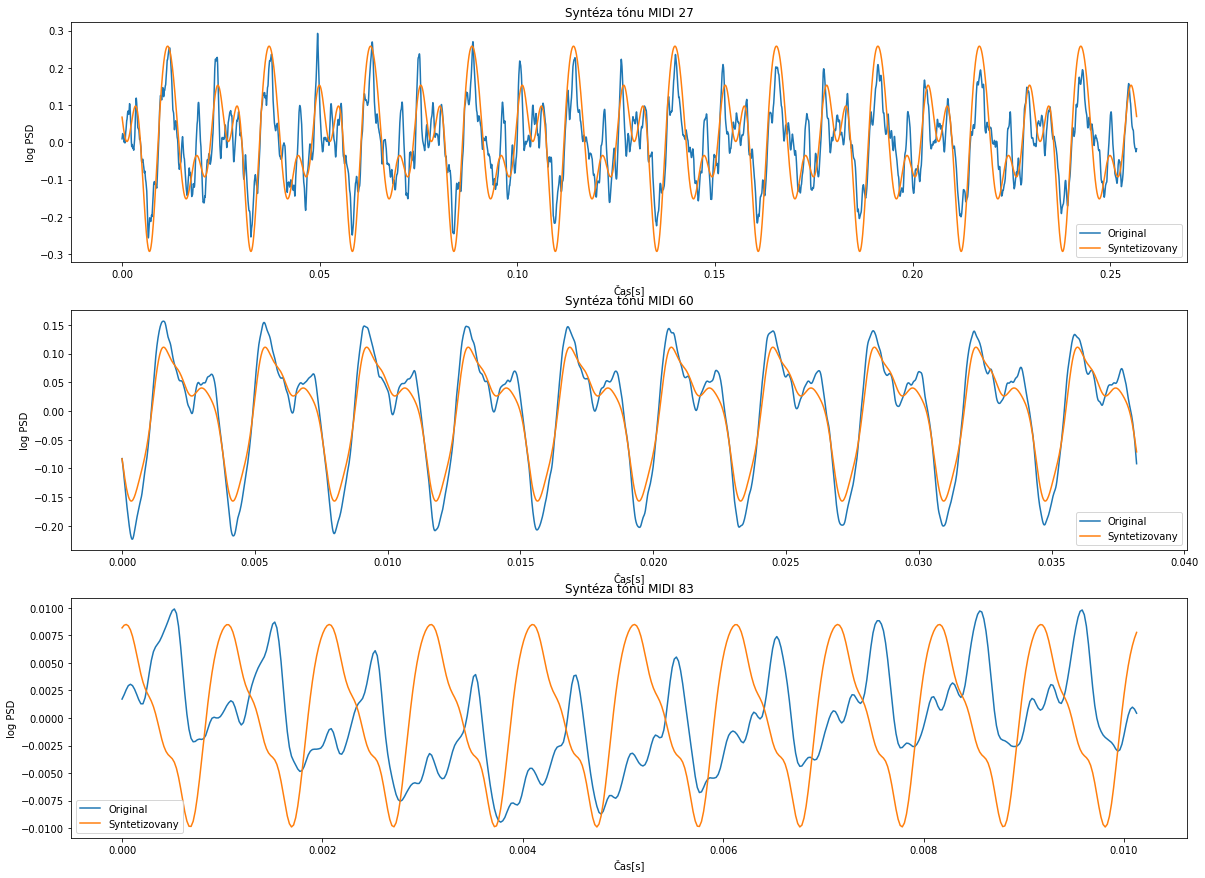

In [125]:
sec = 1
synth_midi27 = get_synthesized_tone(27, sec, Fs)
midi27_freq = 10/basicFreq1[27]
time_steps27 = np.linspace(0, midi27_freq, int(midi27_freq*Fs))

synth_midi60 = get_synthesized_tone(60, sec, Fs)
midi60_freq = 10/basicFreq1[60]
time_steps60 = np.linspace(0, midi60_freq, int(midi60_freq*Fs))

synth_midi83 = get_synthesized_tone(83, sec, Fs)
midi83_freq = 10/basicFreq1[83]
time_steps83 = np.linspace(0, midi83_freq, int(midi83_freq*Fs))

_, ax = plt.subplots(3,1,figsize=(20,15))
ax[0].plot(time_steps27, xall[27][:int(midi27_freq*Fs)], label='Original')
ax[0].plot(time_steps27, synth_midi27[:int(midi27_freq*Fs)]/np.abs(synth_midi27[:int(midi27_freq*Fs)]).max()*xall[27].max(), label='Syntetizovany')
ax[0].set_title("Syntéza tónu MIDI 27")
ax[0].set_xlabel("Čas[s]")
ax[0].set_ylabel("log PSD")
ax[0].legend()

ax[1].plot(time_steps60, xall[60][:int(midi60_freq*Fs)], label='Original')
ax[1].plot(time_steps60, synth_midi60[:int(midi60_freq*Fs)]/np.abs(synth_midi60[:int(midi60_freq*Fs)]).max()*xall[60].max(), label='Syntetizovany')
ax[1].set_title("Syntéza tónu MIDI 60")
ax[1].set_xlabel("Čas[s]")
ax[1].set_ylabel("log PSD")
ax[1].legend()

ax[2].plot(time_steps83, xall[83][:int(midi83_freq*Fs)], label='Original')
ax[2].plot(time_steps83, synth_midi83[:int(midi83_freq*Fs)]/np.abs(synth_midi83[:int(midi83_freq*Fs)]).max()*xall[83].max(), label='Syntetizovany')
ax[2].set_title("Syntéza tónu MIDI 83")
ax[2].set_xlabel("Čas[s]")
ax[2].set_ylabel("log PSD")
ax[2].legend()

plt.show()
sf.write("../audio/a.wav", synth_midi27/np.abs(synth_midi27).max()*xall[27].max(), Fs)
sf.write("../audio/b.wav", synth_midi60/np.abs(synth_midi60).max()*xall[60].max(), Fs)
sf.write("../audio/c.wav", synth_midi83/np.abs(synth_midi83).max()*xall[83].max(), Fs)

# Generace skladby pro 48kHz + spektrogram
Generaci výsledné sklady provádím tak, že syntetizuji daný tón a počítám jak má být dlouhý. Po syntéze tónu ho přičtu do výsledného zvuku na čas ve kterém se má nacházet. Výsledná skladba zní poměrně dobře, jediné co by se dalo zlepšít je lupání.

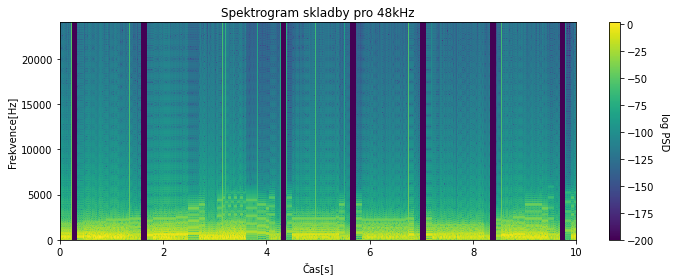

In [122]:

with open("../skladba.txt", "r") as f:
    lines = f.readlines()
max_time = 0.0
sample_rate = 48000



for line in lines:
    line = line.replace("\n", "")
    data = line.split(" ")
    time_to = float(data[1])/1000
    if time_to > max_time:
        max_time = time_to

sound = np.zeros(int(max_time*sample_rate))

for line in lines:
    line = line.replace("\n", "")
    data = line.split(" ")
    time_from = float(data[0])/1000
    time_to = float(data[1])/1000
    tone = int(data[2])
    volume = int(data[3])
    time_length = time_to - time_from
    synthesized_tone = get_synthesized_tone(tone, time_length, sample_rate)
    synthesized_tone = synthesized_tone/np.abs(synthesized_tone).max()*np.abs(xall[tone]).max()*volume
    if synthesized_tone.size != sound[int(time_from*sample_rate):int(time_to*sample_rate)].size:
        sound[int(time_from*sample_rate):int(time_to*sample_rate)-1] += synthesized_tone
    else:
        sound[int(time_from*sample_rate):int(time_to*sample_rate)] += synthesized_tone

sf.write("../audio/out_48k.wav", sound[:10*sample_rate]/np.abs(sound).max(), sample_rate)
plt.show()

f, t, sgr = ss.spectrogram(x=sound[:10*sample_rate], fs = sample_rate, window=('tukey', 0.3), noverlap=0, nfft=2048)
sgr_log = 10*np.log10(sgr+1e-20)
plt.figure(figsize=(10,4))
plt.pcolormesh(t, f, sgr_log)
plt.title("Spektrogram skladby pro 48kHz")
plt.gca().set_xlabel('Čas[s]')
plt.gca().set_ylabel('Frekvence[Hz]')
cbar = plt.colorbar()
cbar.set_label("log PSD", rotation=270, labelpad=15)
plt.tight_layout()

# Generace skladby pro 8kHz + spektrogram

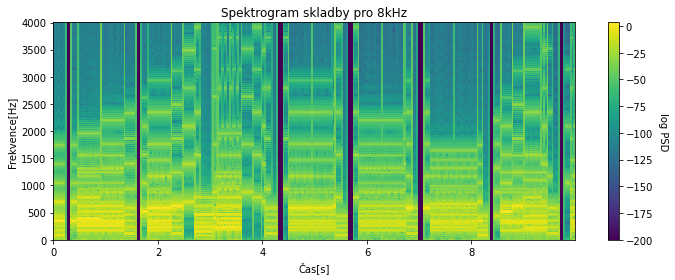

In [121]:
with open("../skladba.txt", "r") as f:
    lines = f.readlines()
max_time = 0.0
sample_rate = 8000



for line in lines:
    line = line.replace("\n", "")
    data = line.split(" ")
    time_to = float(data[1])/1000
    if time_to > max_time:
        max_time = time_to

sound = np.zeros(int(max_time*sample_rate))

for line in lines:
    line = line.replace("\n", "")
    data = line.split(" ")
    time_from = float(data[0])/1000
    time_to = float(data[1])/1000
    tone = int(data[2])
    volume = int(data[3])
    time_length = time_to - time_from
    synthesized_tone = get_synthesized_tone(tone, time_length, sample_rate)
    synthesized_tone = synthesized_tone/np.abs(synthesized_tone).max()*np.abs(xall[tone]).max()*volume
    if synthesized_tone.size != sound[int(time_from*sample_rate):int(time_to*sample_rate)].size:
        sound[int(time_from*sample_rate):int(time_to*sample_rate)-1] += synthesized_tone
    else:
        sound[int(time_from*sample_rate):int(time_to*sample_rate)] += synthesized_tone

sf.write("../audio/out_8k.wav", sound[:10*sample_rate]/np.abs(sound).max(), sample_rate)
plt.show()

f, t, sgr = ss.spectrogram(x=sound[:10*sample_rate], fs = sample_rate, window=('tukey', 0.3), noverlap=0, nfft=2048)
sgr_log = 10*np.log10(sgr+1e-20)
plt.figure(figsize=(10,4))
plt.title("Spektrogram skladby pro 8kHz")
plt.pcolormesh(t, f, sgr_log)
plt.gca().set_xlabel('Čas[s]')
plt.gca().set_ylabel('Frekvence[Hz]')
cbar = plt.colorbar()
cbar.set_label("log PSD", rotation=270, labelpad=15)
plt.tight_layout()